<a href="https://colab.research.google.com/github/tlsrhksdn/2024_2-ADAM/blob/project/%EC%9D%B4%EC%83%81_%EA%B1%B0%EB%9E%98_%EB%8D%B0%EC%9D%B4%ED%84%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install koreanize-matplotlib

In [ ]:
import koreanize_matplotlib
from google.colab import files

# 1. kaggle.json 파일을 Colab에 업로드
files.upload()  # kaggle.json 파일을 업로드

# 2. Kaggle API 설정 파일을 올바른 위치로 이동
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


Saving kaggle.json to kaggle.json


In [ ]:
# 데이터셋 다운로드 명령어
!kaggle datasets download -d waqi786/global-black-money-transactions-dataset

Dataset URL: https://www.kaggle.com/datasets/waqi786/global-black-money-transactions-dataset
License(s): apache-2.0
global-black-money-transactions-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
# 압축 파일 해제
!unzip global-black-money-transactions-dataset.zip -d ./dataset

Archive:  global-black-money-transactions-dataset.zip
replace ./dataset/Big_Black_Money_Dataset.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: ./dataset/Big_Black_Money_Dataset.csv  


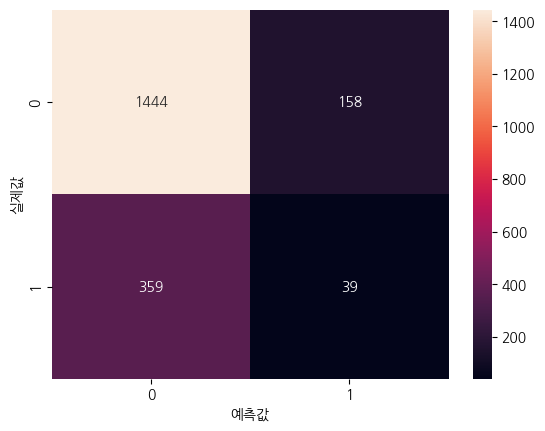

              precision    recall  f1-score   support

           0       0.80      0.90      0.85      1602
           1       0.20      0.10      0.13       398

    accuracy                           0.74      2000
   macro avg       0.50      0.50      0.49      2000
weighted avg       0.68      0.74      0.71      2000



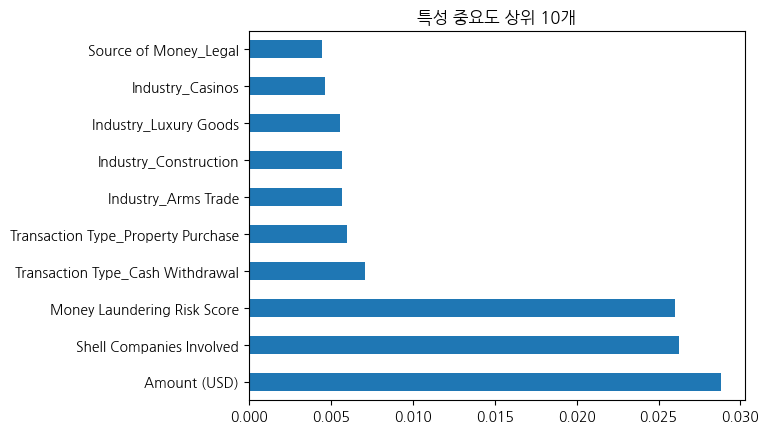

In [ ]:
#1. 라이브러리 및 데이터 로드
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

#2. 데이터 탐색 및 이해
df = pd.read_csv('./dataset/Big_Black_Money_Dataset.csv')
df.head()  # 데이터 확인

# # 데이터의 전체적인 정보 확인
# df.info()

# #수치형 데이터의 통계량 확인
# df.describe()

# # 데이터셋에 포함된 모든 열의 이름을 리스트로 출력
# df.columns.tolist()

# #3. 결측값 및 이상치 처리
# # 각 열에 존재하는 결측값의 수 확인
# df.isnull().sum()

# # 수치형 데이터에서 이상치 있는지 확인
# plt.figure(figsize=(10,6))
# sns.boxplot(x=df['Amount (USD)'])
# plt.show()

# # #4. 데이터 시각화
# 거래 유형('Transaction Type')별 거래 건수 시각화
# plt.figure(figsize=(12, 6))
# sns.countplot(x='Transaction Type', data=df)
# plt.xticks(rotation=45)
# plt.title('거래 유형별 거래 건수')
# plt.show()

# #국가별 거래 금액 합계 시각화(상위 10개 국가)
# country_amount = df.groupby('Country')['Amount (USD)'].sum().sort_values(ascending=False).head(10)
# plt.figure(figsize=(12,6))
# sns.barplot(x=country_amount.index, y=country_amount.values)
# plt.xticks(rotation=45)
# plt.title('국가별 거래 금액 합계 (상위 10개 국가)')
# plt.show()

# #'Money Laundering Risk Score'의 분포 확인
# plt.figure(figsize=(10,6))
# sns.histplot(df['Money Laundering Risk Score'], bins=10, kde=True)
# plt.title('자금세탁 위험 점수 분포')
# plt.show()

# #'Amount(USD)'와 'Money Lanudering Risk Score'의 관계 시각화
# plt.figure(figsize=(10,6))
# sns.scatterplot(x='Amount (USD)', y='Money Laundering Risk Score', data=df)
# plt.title('거래 금액과 자금세탁 위험 점수의 관계')
# plt.show()

#5. 데이터 전처리
df_processed = pd.get_dummies(df, columns=['Transaction Type', 'Country', 'Industry', 'Destination Country', 'Source of Money', 'Financial Institution', 'Tax Haven Country', 'Person Involved'])
# 불필요한 열(예: 'Transaction ID', 'Date of Transaction')은 제거
df_processed.drop(['Transaction ID', 'Date of Transaction'], axis=1, inplace=True)
# 목표 변수 'Reported by Authority'를 숫자형으로 변환
df_processed['Reported by Authority'] = df_processed['Reported by Authority'].map({True:1, False:0})
# 특징(features)와 목표 변수(target)을 분리
X = df_processed.drop('Reported by Authority', axis=1)
y = df_processed['Reported by Authority']

# 6. 데이터 분할
# 모델의 학습과 평가를 위해 데이터를 훈련 세트와 테스트 세트로 분할

# # train_test_split 함수를 사용하여 데이터를 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# # 7. 머신러닝 모델 구축
# # 의사결정 나무 분류기를 사용하여 모델을 학습

# # DecisionTreeClassifier를 사용하여 모델을 초기화하고 훈련 세트로 학습한다.

clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# # 8. 모델 평가
# # 테스트 세트를 사용하여 모델의 성능을 평가

# 예측값 생성
y_pred = clf.predict(X_test)

# 혼동 행렬을 생성하고 시각화
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('예측값')
plt.ylabel('실제값')
plt.show()

# # 분류 보고서를 출력하여 정확도, 정밀도, 재현율 등을 확인
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

# # 9. 결과 해석 및 보고서 작성
# # 분석 결과를 바탕으로 금융 범죄 예방을 위한 인사이트를 도출하고 보고서를 작성한다.

feature_importances = pd.Series(clf.feature_importances_, index=X.columns)
feature_importances.nlargest(10).plot(kind='barh')
plt.title('특성 중요도 상위 10개')
plt.show()
